In [63]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [64]:
file=files.upload()
data=pd.read_csv("moore.csv")
data.columns=['input','target']
data.head()

,input,target
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


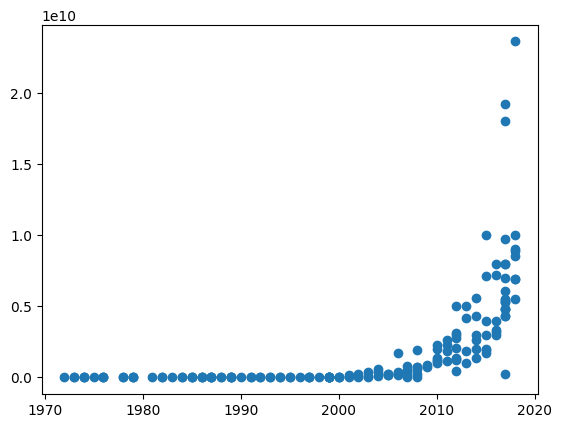

In [65]:
plt.scatter(data['input'],data['target'])

In [73]:
y=np.log(data['target'])
x=data['input']


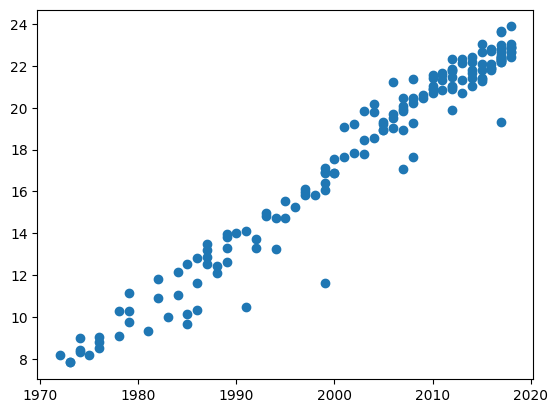

In [84]:
plt.scatter(x,y)

In [86]:
x=x-x.mean()

In [87]:

model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile( optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

In [82]:
def schedule(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [92]:
r=model.fit(x,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8940 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.9501 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8879 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8855 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.9079 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8802 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.9200 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8816 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0211 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 1.1663 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0315 - lr: 0.0

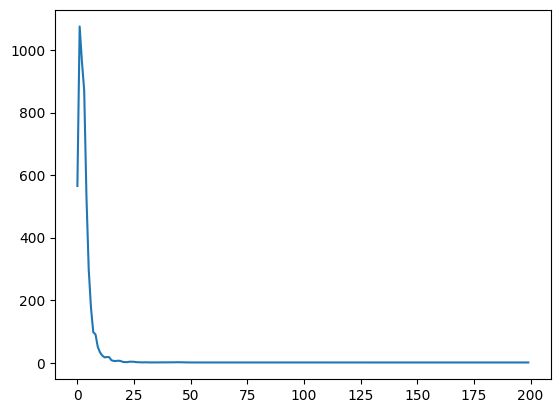

In [89]:
plt.plot(r.history['loss'],label='loss')

In [90]:
print(model.layers)#note there is only on layer:input layer
print(model.layers[0].get_weights())

[array([[0.3483417]], dtype=float32), array([17.822645], dtype=float32)]


In [91]:
#slope of line is:
a=model.layers[0].get_weights()[0][0,0]
print(a)

0.3483417
